In [2]:
import joblib

X_test_scaled, y_test = joblib.load("fraud_detection/data/processed/test.pkl")
best_model = joblib.load("fraud_detection/models/best_random_forest.pkl")

In [3]:
y_test_pred = best_model.predict(X_test_scaled)

Confusion Matrix (Test):
[[91259     1]
 [    1  8739]]

Classification Report (Test):
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000     91260
         1.0     0.9999    0.9999    0.9999      8740

    accuracy                         1.0000    100000
   macro avg     0.9999    0.9999    0.9999    100000
weighted avg     1.0000    1.0000    1.0000    100000

ROC-AUC (Test): 0.999999993731291


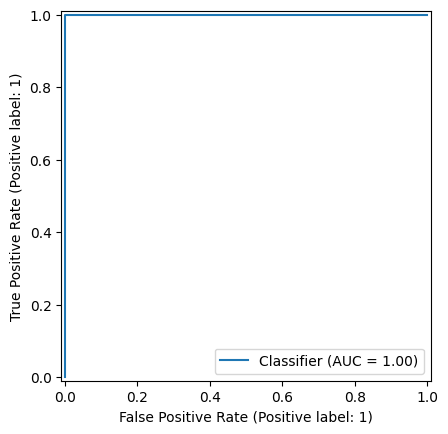

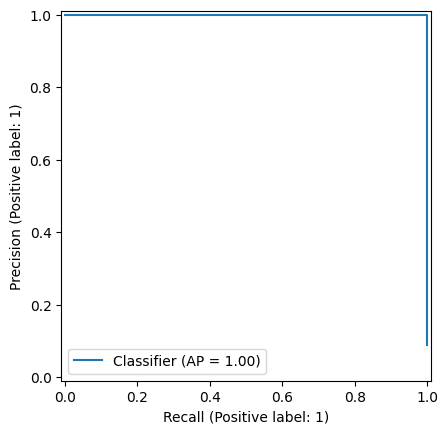

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test):")
print(cm)

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, digits=4))

y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]
roc = roc_auc_score(y_test, y_test_proba)
print("ROC-AUC (Test):", roc)

RocCurveDisplay.from_predictions(y_test, y_test_proba)
PrecisionRecallDisplay.from_predictions(y_test, y_test_proba)